three encodings: 
- shape for qualitative variables
- size for quantitative variables
- color for both qualitative and quantitative variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')

In [3]:
df_fuel = pd.read_csv('fuel-econ.csv')
df_fuel['trans_type'] = df_fuel['trans'].apply(lambda x:x.split()[0])

In [6]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3929 non-null   int64  
 1   make        3929 non-null   object 
 2   model       3929 non-null   object 
 3   year        3929 non-null   int64  
 4   VClass      3929 non-null   object 
 5   drive       3929 non-null   object 
 6   trans       3929 non-null   object 
 7   fuelType    3929 non-null   object 
 8   cylinders   3929 non-null   int64  
 9   displ       3929 non-null   float64
 10  pv2         3929 non-null   int64  
 11  pv4         3929 non-null   int64  
 12  city        3929 non-null   float64
 13  UCity       3929 non-null   float64
 14  highway     3929 non-null   float64
 15  UHighway    3929 non-null   float64
 16  comb        3929 non-null   float64
 17  co2         3929 non-null   int64  
 18  feScore     3929 non-null   int64  
 19  ghgScore    3929 non-null  

In [4]:
np.random.seed(2021)
sample = np.random.choice(df_fuel.shape[0], 200, replace=False)
df_fuel_subset = df_fuel.loc[sample]

In [5]:
df_fuel_subset.co2.describe()

count    200.000000
mean     367.175000
std       83.069592
min       75.000000
25%      309.750000
50%      361.500000
75%      420.500000
max      577.000000
Name: co2, dtype: float64

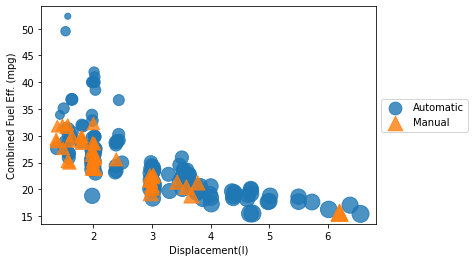

In [6]:
#use seaborn
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]
for ttype, marker in ttype_markers:
    plot_data = df_fuel_subset.loc[df_fuel_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x='displ', y='comb', 
          x_jitter = 0.04, fit_reg=False, marker=marker,
          scatter_kws = {'s':plot_data['co2']/2});
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual'], loc=6, bbox_to_anchor = (1.0, 0.5));

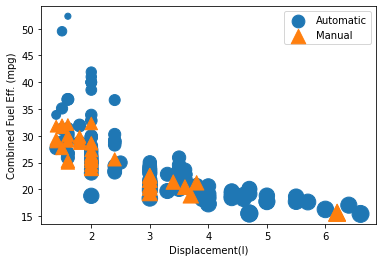

In [7]:
#use matplotlib
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]
for ttype, marker in ttype_markers:
    plot_data = df_fuel_subset.loc[df_fuel_subset['trans_type'] == ttype]
    plt.scatter(data = plot_data, x='displ', y='comb', 
          marker=marker, s=plot_data['co2']/2);
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

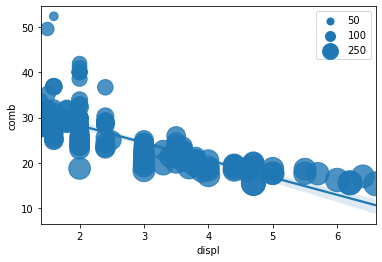

In [8]:
#Encoding via size
sb.regplot(data = df_fuel_subset, x='displ', y='comb', 
          scatter_kws= {'s': df_fuel_subset['co2']});
#dummy series for adding legend
sizes = [50, 100, 250]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s, color=base_color))
plt.legend(legend_obj, sizes)

#### Encoded via color
- qualitative palette
- sequential palette
- diverging palette

In [60]:
df_fuel_subset.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
3490,38931,Infiniti,Q50,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S7),Premium Gasoline,4,2.0,...,102,22.7140,29.0499,29.8341,45.7486,25.4469,349,5,5,Automatic
2417,36851,Honda,Accord,2016,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,2.4,...,103,26.8851,35.0438,35.7245,52.1955,30.2537,292,7,7,Automatic
3110,38210,Kia,Optima FE,2017,Large Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,106,25.1175,32.4759,35.6543,52.0797,28.9701,310,7,7,Automatic
2344,36723,BMW,320i,2016,Compact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,...,96,23.4985,30.1600,35.0451,51.0779,27.5890,323,7,7,Automatic
1452,35001,Buick,Regal eAssist,2015,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,98,24.4382,31.5000,35.1195,51.2000,28.3133,314,7,7,Automatic


In [61]:
df_fuel_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 3490 to 78
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          200 non-null    int64  
 1   make        200 non-null    object 
 2   model       200 non-null    object 
 3   year        200 non-null    int64  
 4   VClass      200 non-null    object 
 5   drive       200 non-null    object 
 6   trans       200 non-null    object 
 7   fuelType    200 non-null    object 
 8   cylinders   200 non-null    int64  
 9   displ       200 non-null    float64
 10  pv2         200 non-null    int64  
 11  pv4         200 non-null    int64  
 12  city        200 non-null    float64
 13  UCity       200 non-null    float64
 14  highway     200 non-null    float64
 15  UHighway    200 non-null    float64
 16  comb        200 non-null    float64
 17  co2         200 non-null    int64  
 18  feScore     200 non-null    int64  
 19  ghgScore    200 non-null   

C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


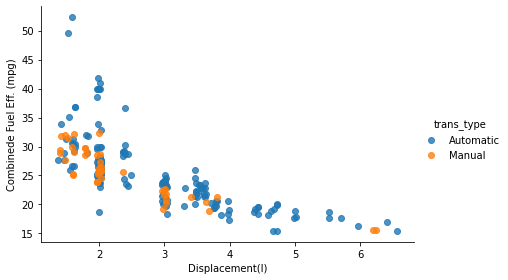

In [9]:
g = sb.FacetGrid(data = df_fuel_subset, hue='trans_type',
                hue_order = ['Automatic', 'Manual'], size=4, aspect=1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(l)')
plt.ylabel('Combinede Fuel Eff. (mpg)');

In [64]:
df_fuel_subset.VClass.unique()

array(['Midsize Cars', 'Large Cars', 'Compact Cars', 'Subcompact Cars',
       'Minicompact Cars'], dtype=object)

C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


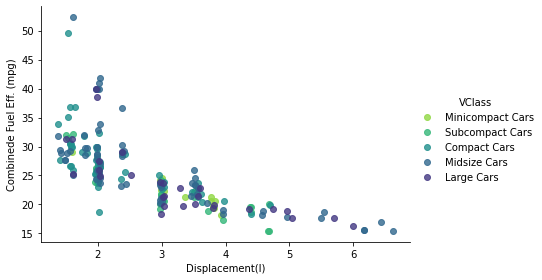

In [67]:
g = sb.FacetGrid(data = df_fuel_subset, hue='VClass', hue_order=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'],
                size=4, aspect=1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(l)')
plt.ylabel('Combinede Fuel Eff. (mpg)');

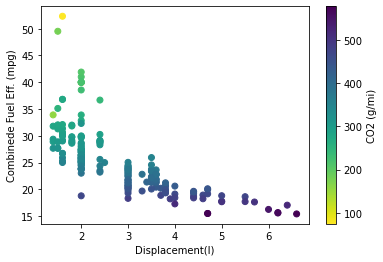

In [68]:
plt.scatter(data=df_fuel_subset, x='displ', y='comb', c='co2',
           cmap='viridis_r')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement(l)')
plt.ylabel('Combinede Fuel Eff. (mpg)');

relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

Text(0, 0.5, 'Special Defense')

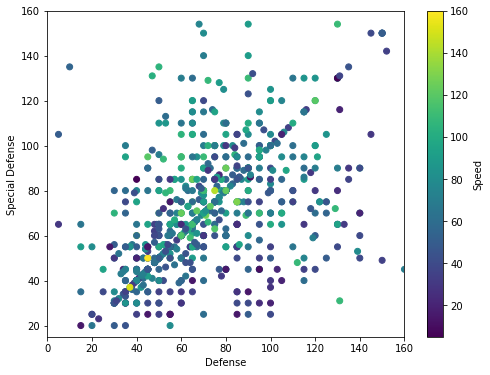

In [72]:
plt.figure(figsize = [8,6])
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense',
                c = 'speed')
plt.colorbar(label = 'Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense')

How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. Hint: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its .set() method will be vital for adjusting the axis scaling and tick marks. Check the last example in the Seaborn documentation for an example of how the .set() method is used, and the matplotlib documentation of the Axes class for properties that you might want to set.

In [73]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [11]:
type_cols = ['type_1', 'type_2']
nontype_cols = pokemon.columns.difference(type_cols)
pokemon_type = pokemon.melt(id_vars=nontype_cols, value_vars=type_cols,
                           var_name='type_level', value_name='type').dropna()
pokemon_type.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


In [12]:
pokemon_type.type.unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [15]:
pokemon_sub = pokemon_type.loc[pokemon_type['type'].isin(['fairy','dragon'])]
pokemon_sub.describe()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,speed,weight
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,77.163043,170.739130,75.706522,4.619565,1.439130,72.956522,524.597826,80.869565,81.923913,66.782609,86.643478
std,33.150432,85.069057,27.862511,1.982575,1.338849,29.080001,236.080591,32.642660,30.944201,28.462362,154.770876
min,20.000000,38.000000,15.000000,1.000000,0.100000,20.000000,35.000000,20.000000,20.000000,15.000000,0.100000
25%,50.000000,93.250000,56.500000,3.000000,0.600000,53.500000,329.750000,55.000000,55.000000,45.000000,6.600000
50%,75.000000,167.500000,75.000000,5.000000,1.100000,70.000000,633.500000,80.000000,80.000000,65.000000,22.350000
75%,100.000000,257.000000,90.000000,6.000000,1.800000,86.250000,714.250000,100.000000,105.000000,90.000000,87.500000
max,150.000000,306.000000,150.000000,7.000000,7.000000,223.000000,804.000000,150.000000,154.000000,130.000000,888.000000


In [17]:
np.log(pokemon_sub.weight.describe())

count    4.521789
mean     4.461802
std      5.041946
min     -2.302585
25%      1.887070
50%      3.106826
75%      4.471639
max      6.788972
Name: weight, dtype: float64

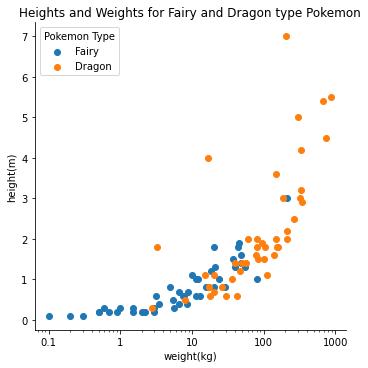

In [14]:
g = sb.FacetGrid(data=pokemon_sub, hue='type', height=5)
g.map(plt.scatter, 'weight', 'height')
g.set(xscale='log')
ticks = [0.1, 1, 10, 100, 1000]
g.set(xticks=ticks, xticklabels=ticks)
plt.title('Heights and Weights for Fairy and Dragon type Pokemon')
plt.xlabel('weight(kg)')
plt.ylabel('height(m)')
plt.legend(['Fairy', 'Dragon'], title='Pokemon Type');

####  Faceting for Multivariate Data

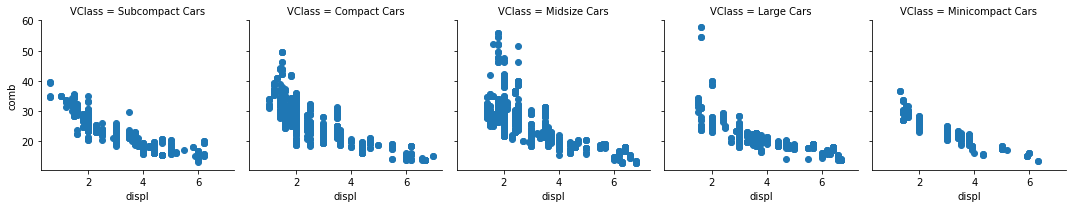

In [96]:
g=sb.FacetGrid(data=df_fuel, col='VClass')
g.map(plt.scatter, 'displ', 'comb')

Setting margin_titles = True means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

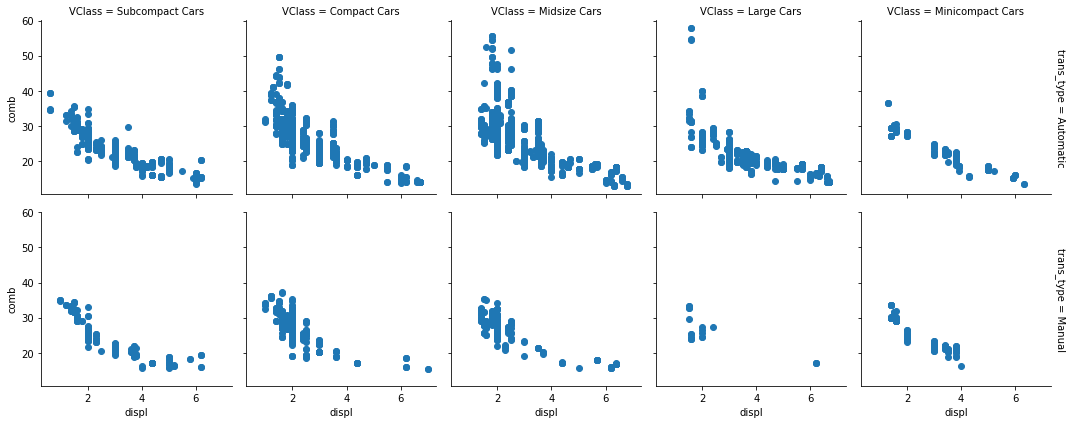

In [95]:
g=sb.FacetGrid(data=df_fuel, col='VClass', row='trans_type',
              margin_titles = True)
g.map(plt.scatter, 'displ', 'comb')

In [152]:
#additional adaptations of bivarariate plots

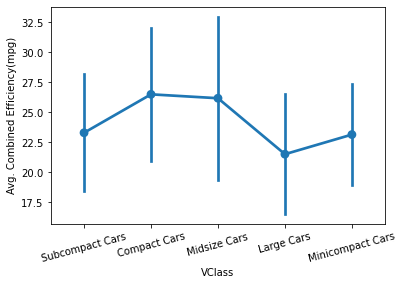

In [100]:
#bivariate adaptation
sb.pointplot(data=df_fuel, x='VClass', y='comb', ci='sd', linestyples="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency(mpg)');

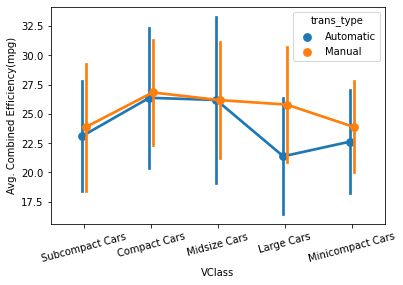

In [102]:
#multivariate adaptation
sb.pointplot(data=df_fuel, x='VClass', y='comb', hue='trans_type',
             ci='sd', linestyples="", dodge=True)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency(mpg)');

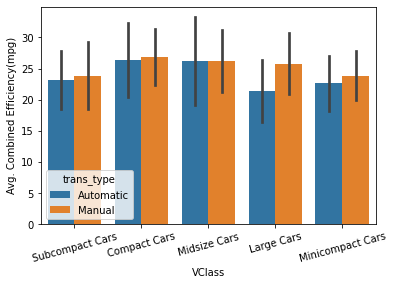

In [104]:
#multivariate adaptation
sb.barplot(data=df_fuel, x='VClass', y='comb', hue='trans_type',
             ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency(mpg)');

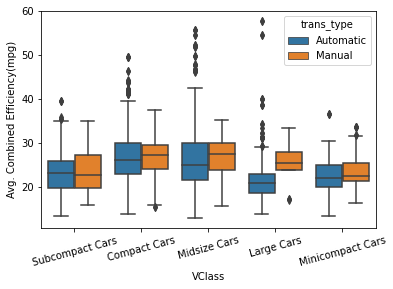

In [106]:
#multivariate adaptation
sb.boxplot(data=df_fuel, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efficiency(mpg)');

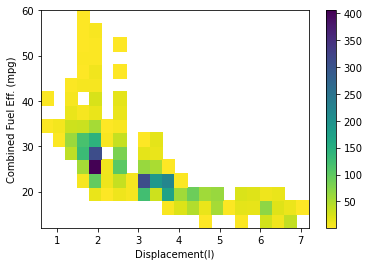

In [107]:
#color and density of data
#bivariate relation - displ vs comb
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=df_fuel, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y]);
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar();

In [114]:
#multivariate relation 
displ_bins = pd.cut(df_fuel['displ'], bins_x, right=False, include_lowest=False,
                   labels=False).astype(int)
comb_bins = pd.cut(df_fuel['comb'], bins_y, right=False, include_lowest=False,
                  labels=False).astype(int)
n_points = df_fuel.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values
co2_weights = df_fuel['co2']/n_points[displ_bins, comb_bins]

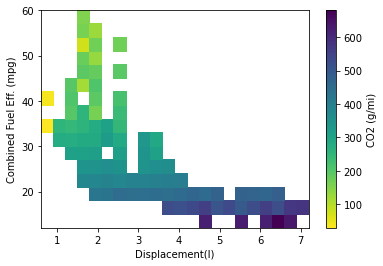

In [115]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=df_fuel, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weights);
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label='CO2 (g/mi)');

In [119]:
pokemon

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


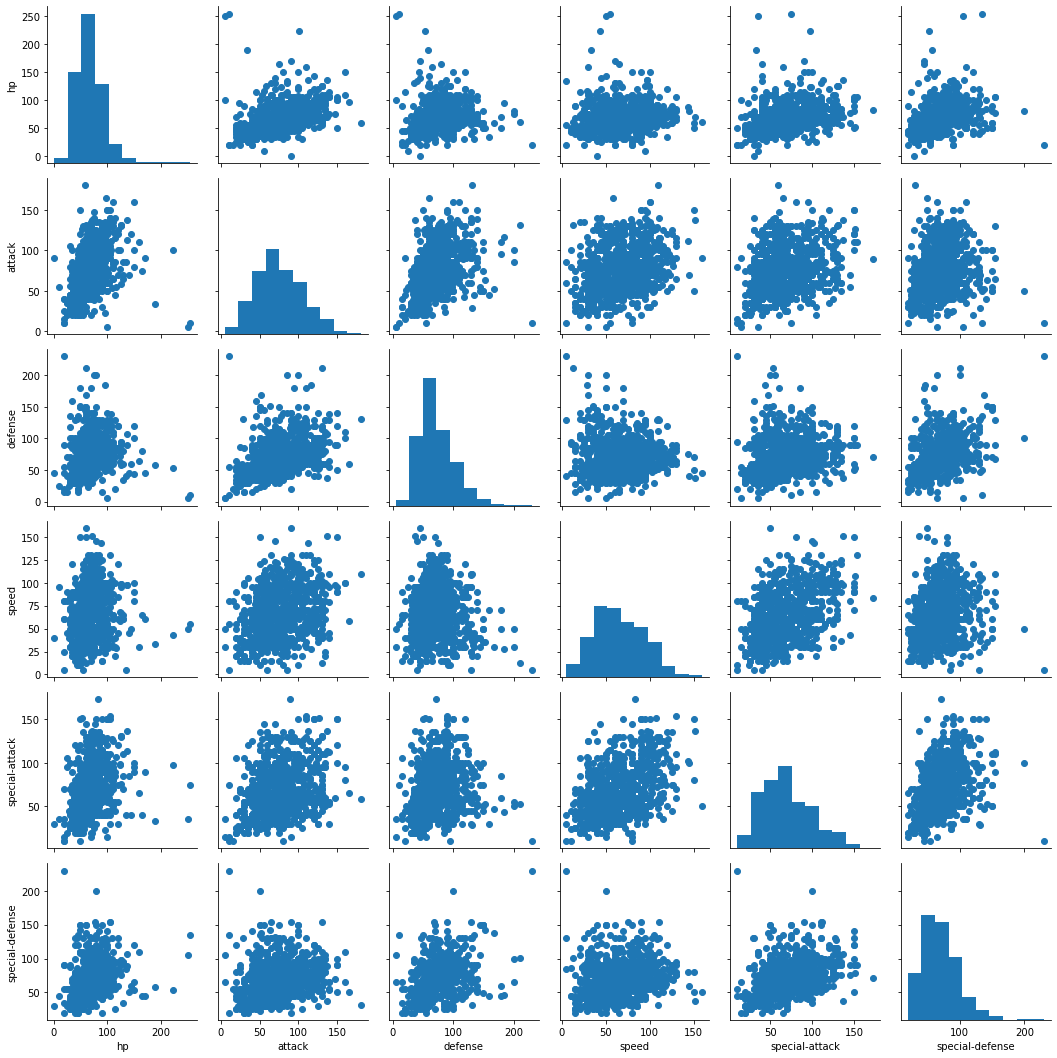

In [123]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data=pokemon, vars =  pkmn_stats);
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

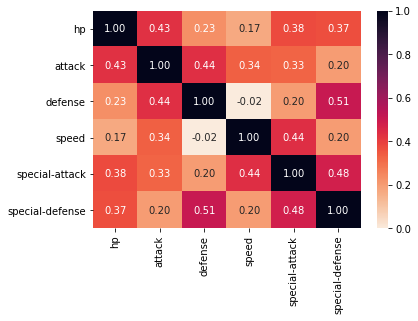

In [131]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap='rocket_r', annot=True,
          fmt='.2f', vmin=0);

In [132]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

In [134]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

In [140]:
pokemon['def_ratio'].describe()

count    807.000000
mean       1.100616
std        0.505062
min        0.047619
25%        0.875000
50%        1.000000
75%        1.160766
max        4.225806
Name: def_ratio, dtype: float64

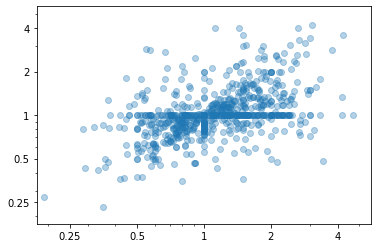

In [151]:
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha=1/3)
plt.xscale('log')
plt.yscale('log')
tickmarks=[0.25, 0.5, 1, 2, 4, 8]
plt.xticks(tickmarks, tickmarks)
plt.yticks(tickmarks, tickmarks)
plt.xlim(2**-2.5, 2**2.5)
plt.ylim(2**-2.5, 2**2.5);